In [22]:
# importações
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# Coletando e preparando os dados
Vamos usar um dataset já pronto do keras, são imagens de numeros de 1 a 10.

11501568/11490434 [==============================] - 0s 0us/step


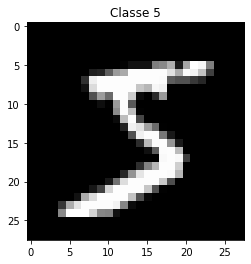

In [6]:
# Coletando os dados da biblioteca do keras.
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Deixado as imagens em escala 1, ou seja, em cinza. 
# Imagens em colorido aumentam muito o tempo de processamento e neste caso não é necessario as cores.
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

# Colocando os dados no formato do tensorflow
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1) # o 1 aqui é a escala de cor, no caso 1 é cinza. 3 seria RGB(colorido).
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

# Transformando o tipo dos dados para float32 para o proximo processamento.
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

# Aqui estamos transformando os dados para que fiquem na escala entre zero e um.
previsores_treinamento /= 255
previsores_teste /= 255

# Aplicando o onehotencoding através do np_utils, nas classes.
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

# Criando a Rede Neural Convolucional

In [7]:
# Criando o classificador
classificador = Sequential()
# Aplicando as etapas de preprocessamento para redes convolucionais.
# Etapa 1: Operador de convolução.
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
# Etapa 2: Função Polling, no caso vamos ultilizar a max.
classificador.add(MaxPooling2D(pool_size = (2,2)))
# Etapa 3: Flatenning, que é transformar os dados de matriz para vetor.
classificador.add(Flatten())

In [8]:
# Criando a rede neural
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

# Treinando e avaliando a rede.

In [14]:
# Treinando a rede convolucional
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))  # somente 5 epocas para não demorar muito.
                  # Usando o parametro validation data para mostrar o accuracy nos dados de teste ao mesmo tempo que treina.

Epoch 1/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0454 - val_accuracy: 0.9853
Epoch 2/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0426 - val_accuracy: 0.9864
Epoch 3/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 4/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0457 - val_accuracy: 0.9864


In [12]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 2s 7ms/step - loss: 0.0458 - accuracy: 0.9851


In [13]:
resultado

[0.045815788209438324, 0.9850999712944031]

# Melhorando os resultados
Vamos adicionar camadas e funçoes.
Apesar de não precisar pois nossos dados são simples, num probelma mais complexo seria muito necessario melhorar a rede.

In [23]:

classificador = Sequential()
classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())         # normalizamos os dados antes da camada de convolução.
# agora estamos normalizando após tbm, onde o feature map vai estar normalizado tbm, fazendo com que o processamento seja mais rapido;
classificador.add(MaxPooling2D(pool_size = (2,2)))
#classificador.add(Flatten()) O flatten só entra apos a ultima camada convulucional. Ou seja, so uma vez no final.

# Mais uma camada convolucional.
classificador.add(Conv2D(32, (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))   # Adicionando o dropout pra evitar overfiting, mas as vez tbm pode aumentar o accuracy.
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, 
                        activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/5
469/469 [==============================] - 57s 120ms/step - loss: 0.2021 - accuracy: 0.9381 - val_loss: 0.1525 - val_accuracy: 0.9592
Epoch 2/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0607 - accuracy: 0.9821 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 3/5
469/469 [==============================] - 64s 137ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0412 - val_accuracy: 0.9878
Epoch 4/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0334 - val_accuracy: 0.9905


In [24]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
# Aumentamos para 99% de accuracy!

313/313 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9905


# Testando com uma imagem

Text(0.5, 1.0, 'Classe 7')

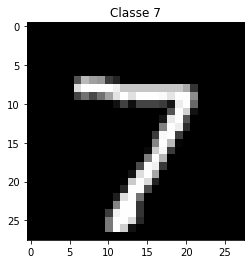

In [25]:
# Nesse exemplo escolhi a primeira imagem da base de teste e abaixo você
# pode visualizar que trata-se do número 7
plt.imshow(X_teste[0], cmap = 'gray')
plt.title('Classe ' + str(y_teste[0]))

In [26]:
# Criamos uma única variável que armazenará a imagem a ser classificada e
# também fazemos a transformação na dimensão para o tensorflow processar
imagem_teste = X_teste[0].reshape(1, 28, 28, 1)

In [27]:
# Convertermos para float para em seguida podermos aplicar a normalização
imagem_teste = imagem_teste.astype('float32')
imagem_teste /= 255

In [28]:
# Fazemos a previsão, passando como parâmetro a imagem
# Como temos um problema multiclasse e a função de ativação softmax, será
# gerada uma probabilidade para cada uma das classes. A variável previsão
# terá a dimensão 1, 10 (uma linha e dez colunas), sendo que em cada coluna
# estará o valor de probabilidade de cada classe
previsoes = classificador.predict(imagem_teste)

In [29]:

# Como cada índice do vetor representa um número entre 0 e 9, basta agora
# buscarmos qual é o maior índice e o retornarmos. Executando o código abaixo
# você terá o índice 7 que representa a classe 7
import numpy as np
resultado = np.argmax(previsoes)

In [30]:
resultado

7